In [1]:
from __future__ import print_function, division
import numpy as np
from __future__ import print_function, division
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
forest = pd.read_csv("forestfires.csv")
forest 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [4]:
forest.drop(columns=['dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr',
                    'monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar',
                   'monthmay','monthnov','monthoct','monthsep' ], inplace= True)
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [5]:
string_columns=["month","day"]

In [6]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
for i in string_columns:
    forest[i] = number.fit_transform(forest[i])

In [7]:
forest 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
train,test = train_test_split(forest,test_size = 0.3, random_state=1) 

In [9]:
train 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
13,11,1,90.9,126.5,686.5,7.0,21.3,42,2.2,0.0,0.00,small
61,7,3,89.3,51.3,102.2,9.6,5.5,59,6.3,0.0,0.00,small
453,1,4,89.4,266.2,803.3,5.6,17.4,54,3.1,0.0,0.00,small
39,7,5,88.1,25.7,67.6,3.8,14.1,43,2.7,0.0,0.00,small
373,1,4,94.8,222.4,698.6,13.9,20.3,42,2.7,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
129,10,3,92.6,46.5,691.8,8.8,15.4,35,0.9,0.0,0.00,small
144,1,6,95.5,99.9,513.3,13.2,23.8,32,5.4,0.0,0.77,small
72,7,0,91.7,33.3,77.5,9.0,15.6,25,6.3,0.0,0.00,small
235,1,3,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48,large


In [10]:
test 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
270,1,5,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,0.52,small
90,1,2,90.2,96.9,624.2,8.9,14.7,59,5.8,0.0,0.00,small
133,11,4,93.7,80.9,685.2,17.9,17.6,42,3.1,0.0,0.00,small
221,11,0,93.3,141.2,713.9,13.9,18.6,49,3.6,0.0,35.88,large
224,11,6,90.1,82.9,735.7,6.2,15.4,57,4.5,0.0,37.71,large
...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,2,96.0,164.0,643.0,14.0,30.8,30,4.9,0.0,8.59,large
95,11,3,89.7,90.0,704.4,4.8,17.8,64,1.3,0.0,0.00,small
122,11,3,92.4,124.1,680.7,8.5,22.5,42,5.4,0.0,0.00,small
165,7,4,84.9,18.2,55.0,3.0,5.3,70,4.5,0.0,2.14,small


In [11]:
train_X = train.iloc[:,0:11]
train_y = train.iloc[:,11]
test_X  = test.iloc[:,0:11]
test_y  = test.iloc[:,11] 

In [12]:
train_X 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
13,11,1,90.9,126.5,686.5,7.0,21.3,42,2.2,0.0,0.00
61,7,3,89.3,51.3,102.2,9.6,5.5,59,6.3,0.0,0.00
453,1,4,89.4,266.2,803.3,5.6,17.4,54,3.1,0.0,0.00
39,7,5,88.1,25.7,67.6,3.8,14.1,43,2.7,0.0,0.00
373,1,4,94.8,222.4,698.6,13.9,20.3,42,2.7,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
129,10,3,92.6,46.5,691.8,8.8,15.4,35,0.9,0.0,0.00
144,1,6,95.5,99.9,513.3,13.2,23.8,32,5.4,0.0,0.77
72,7,0,91.7,33.3,77.5,9.0,15.6,25,6.3,0.0,0.00
235,1,3,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48


In [13]:
test_X 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
270,1,5,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,0.52
90,1,2,90.2,96.9,624.2,8.9,14.7,59,5.8,0.0,0.00
133,11,4,93.7,80.9,685.2,17.9,17.6,42,3.1,0.0,0.00
221,11,0,93.3,141.2,713.9,13.9,18.6,49,3.6,0.0,35.88
224,11,6,90.1,82.9,735.7,6.2,15.4,57,4.5,0.0,37.71
...,...,...,...,...,...,...,...,...,...,...,...
494,1,2,96.0,164.0,643.0,14.0,30.8,30,4.9,0.0,8.59
95,11,3,89.7,90.0,704.4,4.8,17.8,64,1.3,0.0,0.00
122,11,3,92.4,124.1,680.7,8.5,22.5,42,5.4,0.0,0.00
165,7,4,84.9,18.2,55.0,3.0,5.3,70,4.5,0.0,2.14


In [14]:
train_y 

13     small
61     small
453    small
39     small
373    small
       ...  
129    small
144    small
72     small
235    large
37     small
Name: size_category, Length: 361, dtype: object

In [15]:
test_y 

270    small
90     small
133    small
221    large
224    large
       ...  
494    large
95     small
122    small
165    small
23     small
Name: size_category, Length: 156, dtype: object

In [16]:
model_linear = SVC(kernel = "linear")
model_linear.fit(train_X,train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear==test_y) 

1.0

In [17]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(train_X,train_y) 
pred_test_poly = model_poly.predict(test_X)
np.mean(pred_test_poly==test_y) 

0.7884615384615384

In [18]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(train_X,train_y)
pred_test_rbf = model_rbf.predict(test_X)

np.mean(pred_test_rbf==test_y)

0.7692307692307693

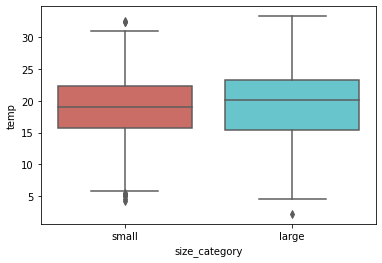

In [20]:
sns.boxplot(x="size_category",y="temp",data=forest,palette = "hls")


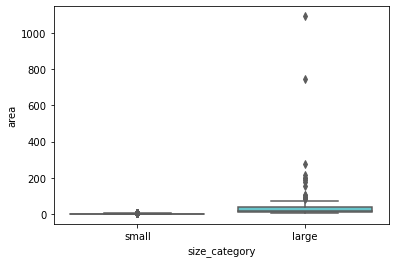

In [21]:
sns.boxplot(x="size_category",y="area",data=forest,palette = "hls")


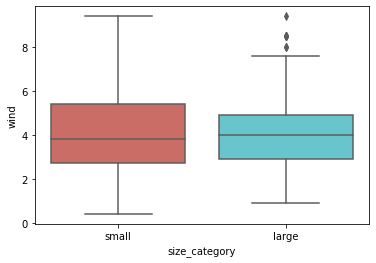

In [22]:
sns.boxplot(x="size_category",y="wind",data=forest,palette = "hls")


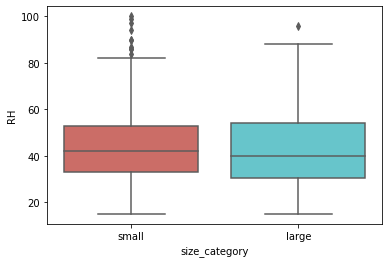

In [23]:
sns.boxplot(x="size_category",y="RH",data=forest,palette = "hls")


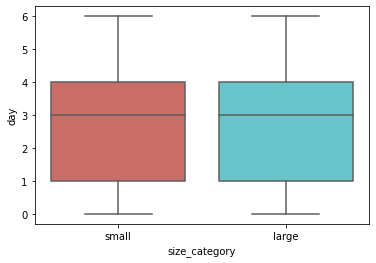

In [24]:
sns.boxplot(x="size_category",y="day",data=forest,palette = "hls")
